In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import seed_everything
from sklearn import linear_model as LM
import seaborn as sns

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target
# OneHot = OneHotEncoder(sparse=False)
# y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Define and Train Model

In [4]:
MyLR = LM.LogisticRegressionCV(solver = 'saga')

In [5]:
MyTrainer = Trainer(model = MyLR, scale_X = True, use_pca = True, n_components = 3)

In [6]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [7]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [8]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Running for split 2 of 5
Running for split 3 of 5
Running for split 4 of 5
Running for split 5 of 5


In [9]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.975000,train
1,0.975000,train
2,0.966667,train
3,0.975000,train
4,0.975000,train
0,1.000000,test
1,0.966667,test
2,1.000000,test
3,1.000000,test
4,0.966667,test


<AxesSubplot:xlabel='stage', ylabel='score'>

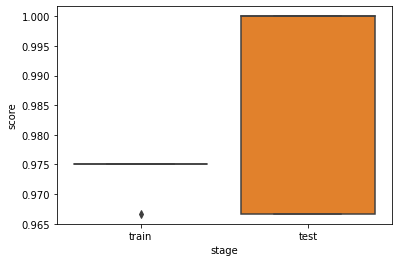

In [10]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

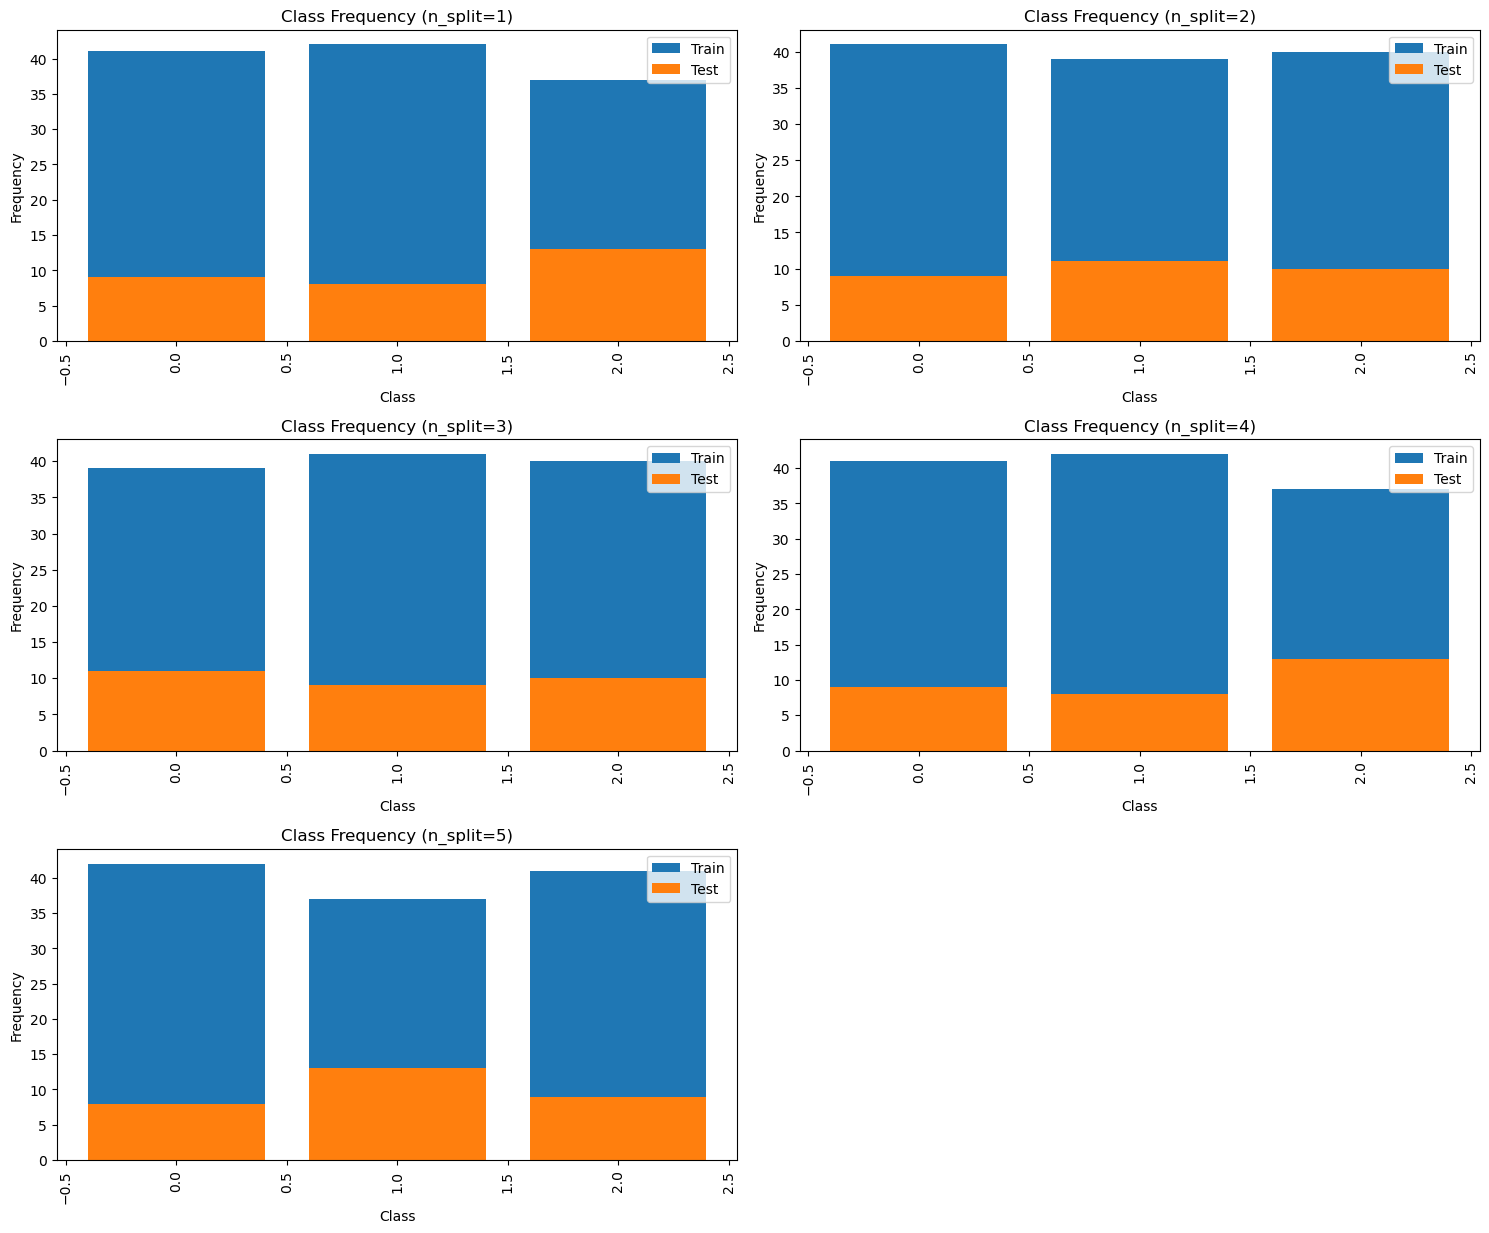

In [11]:
MyMultiTrainTester.plot_class_freq(normalize=True)

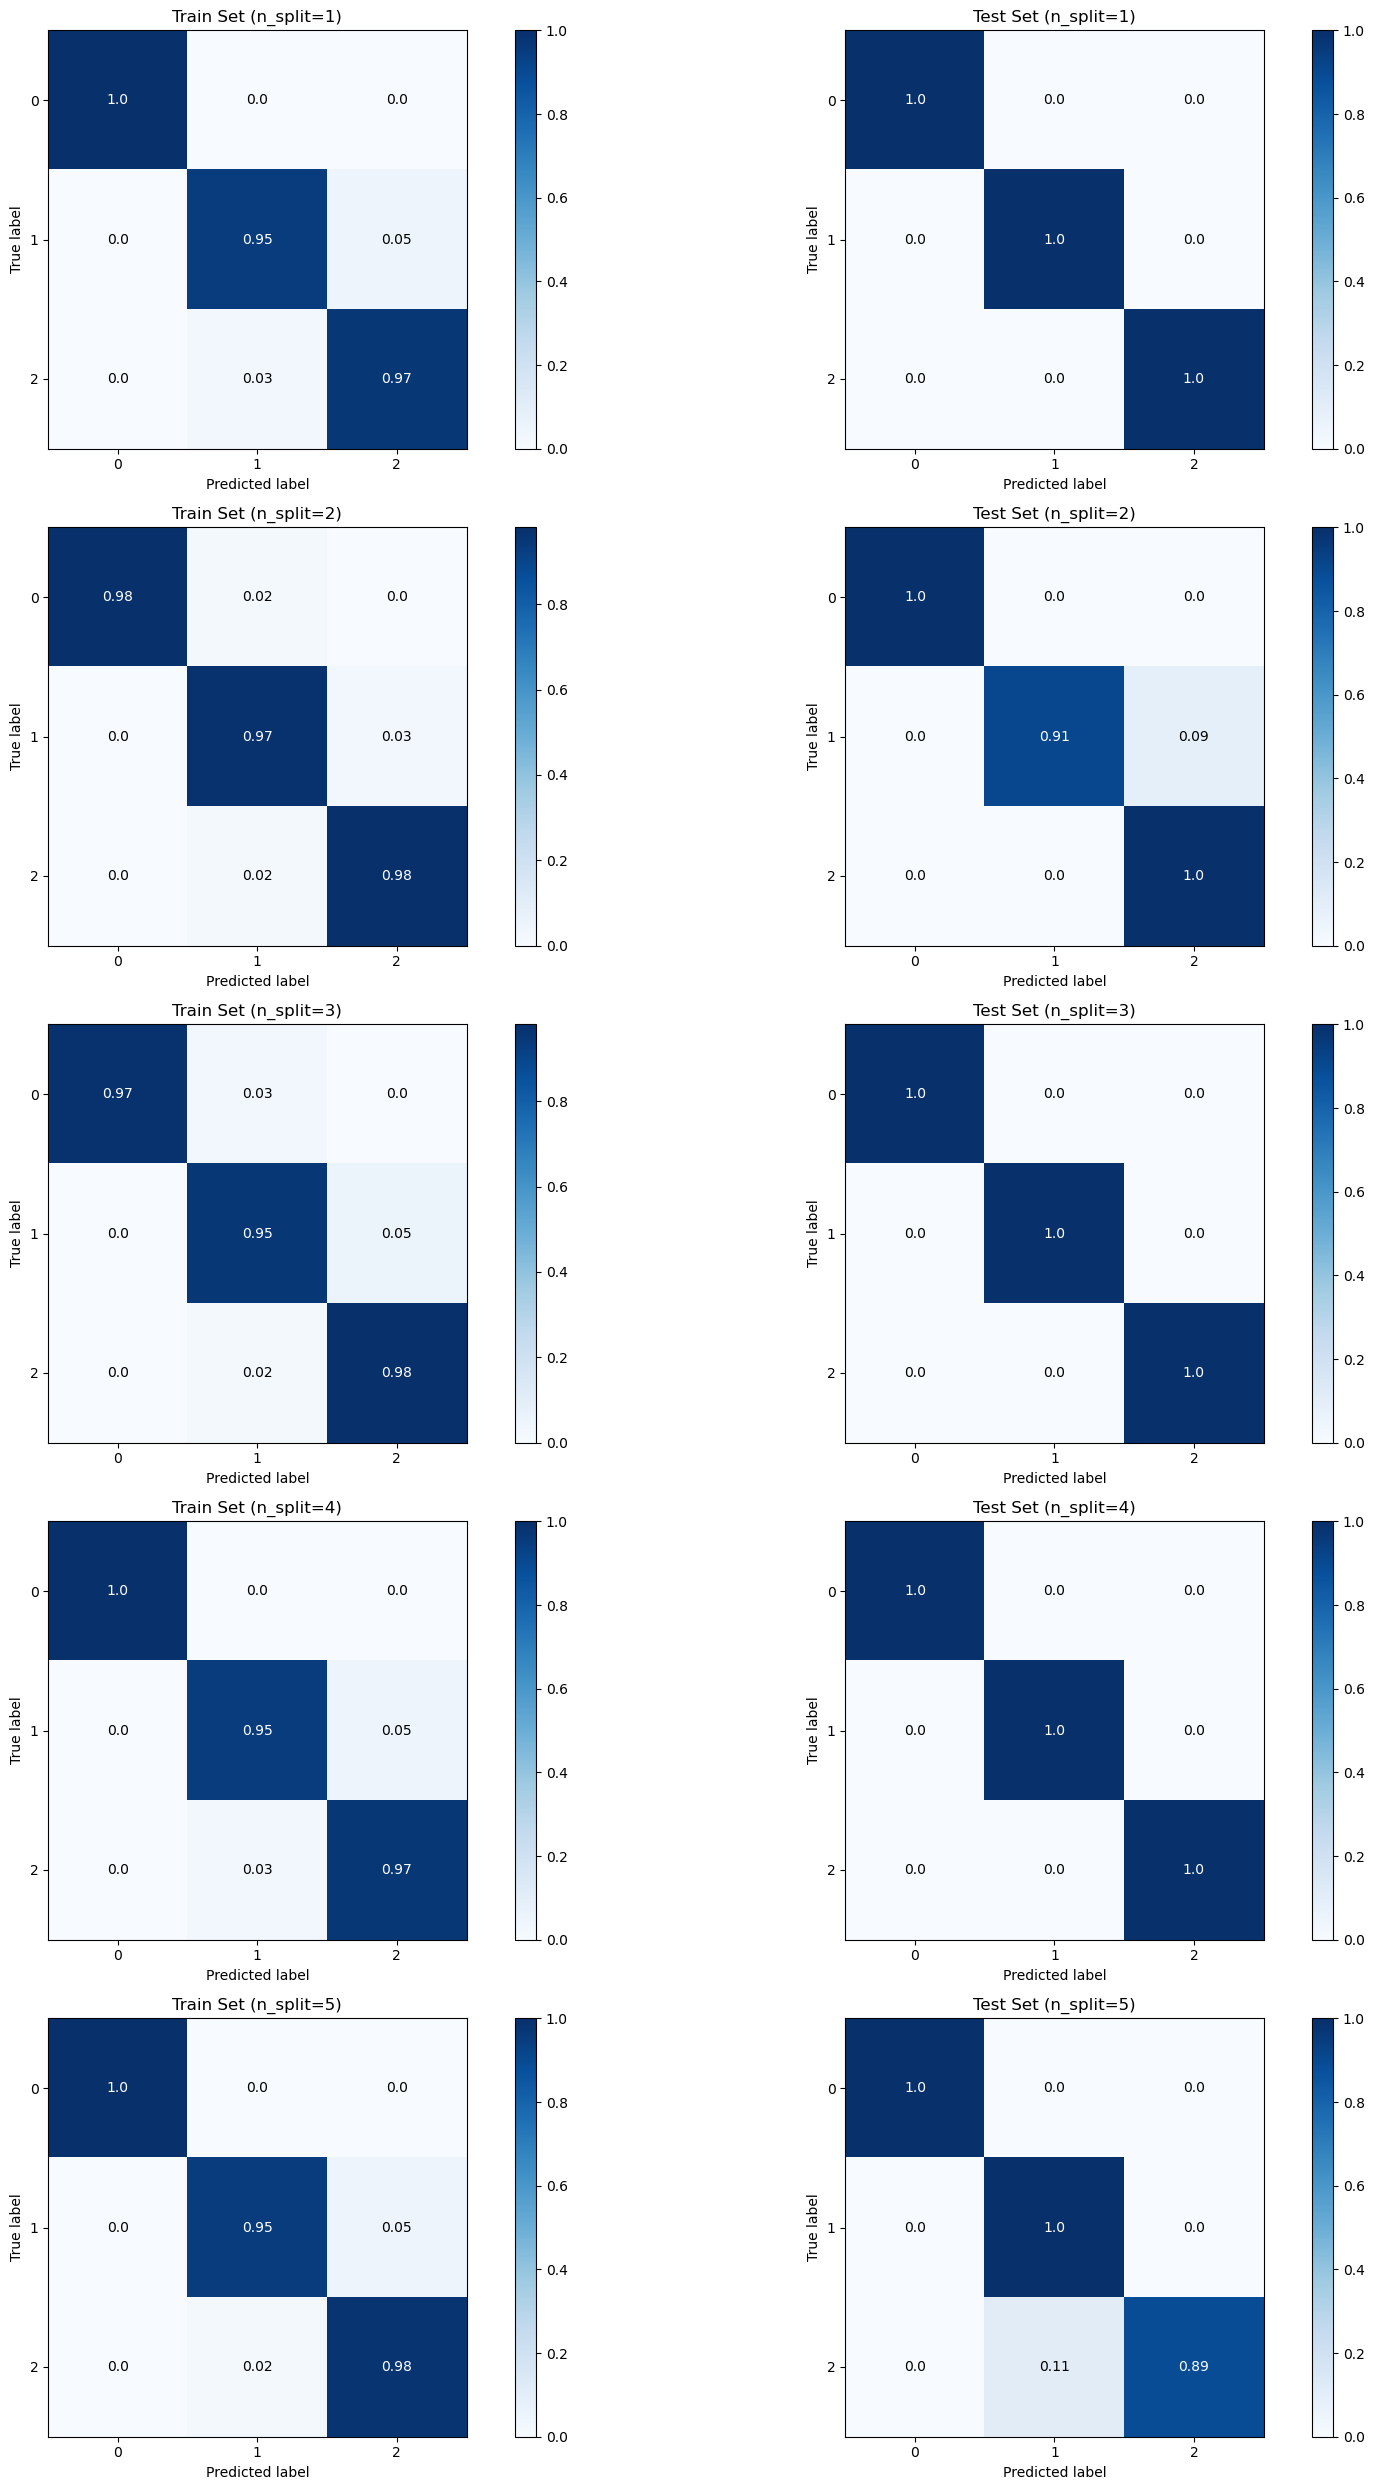

In [12]:
MyMultiTrainTester.plot_confusion(normalize=True)